In [5]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [1]:
import bt
import pandas as pd
import yfinance as yf
import numpy as np

c:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


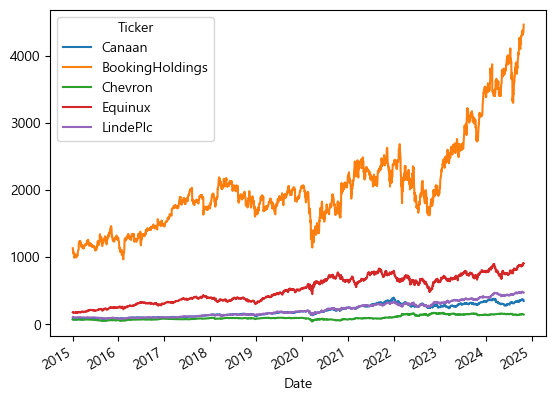

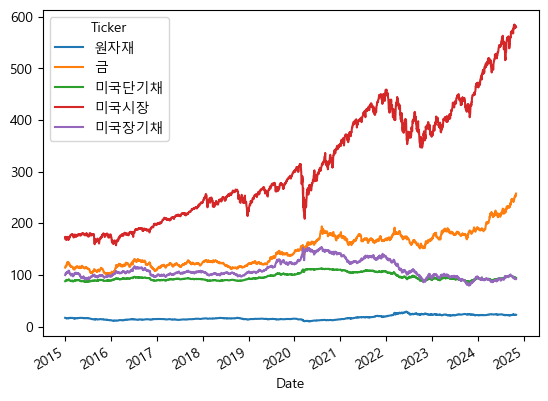

In [6]:
start = '2015-01-01'
end = '2024-10-31'

# 데이터 불러오기
data = pd.read_csv(f'/Users/user/Desktop/수금의왕/sector(assets)_개별종목_호준.csv', encoding="utf-8")
tickers = data['티커'].tolist()

assets = tickers

# 티커를 섹터(자산군)으로 매핑
ticker_to_name = dict(zip(data['티커'], data['섹터(자산군)']))

# 데이터 다운로드
data = yf.download(assets, start=start, end=end)['Adj Close']

# prices의 칼럼명(티커)을 "섹터(자산군)"으로 변환
data.rename(columns=ticker_to_name, inplace=True)

data.plot()




# 벤치마크 데이터 불러오기
df = pd.read_csv(f'/Users/user/Desktop/수금의왕/벤치마크종목.csv', encoding="utf-8")
tickers = df['티커'].tolist()

assets = tickers

# 티커를 섹터(자산군)으로 매핑
ticker_to_name = dict(zip(df['티커'], df['섹터(자산군)']))

# 데이터 다운로드
df = yf.download(assets, start=start, end=end)['Adj Close']

# prices의 칼럼명(티커)을 "섹터(자산군)"으로 변환
df.rename(columns=ticker_to_name, inplace=True)

df.plot()


data.replace(0, np.nan, inplace=True)
df.replace(0, np.nan, inplace=True)

In [13]:
s = bt.Strategy('Top5',
                [bt.algos.RunYearly(run_on_first_date=True,
                                    run_on_end_of_period=True,
                                    run_on_last_date=False),
                 bt.algos.SelectAll(),
                 bt.algos.WeighEqually(),
                 bt.algos.Rebalance()
                 ])

bt1 = bt.Backtest(s, data, initial_capital=10000000)

In [14]:
# 벤치마크 - 미국시장
def buy_and_hold(df, name='buy_and_hold') :
    s = bt.Strategy(name, [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    return bt.Backtest(s, df, initial_capital=10000000)


SPY = buy_and_hold(df['미국시장'].to_frame(), name='SPY')

In [15]:
# 벤치마크 - 올웨더
all_weather = bt.Strategy('all_weather',
                [bt.algos.RunYearly(run_on_first_date=True,
                                    run_on_end_of_period=True,
                                    run_on_last_date=False),
                 bt.algos.SelectAll(),
                 bt.algos.WeighSpecified(**{
                     '미국시장': 0.30,
                     '미국장기채': 0.40,
                     '미국단기채': 0.15,
                     '금': 0.055,
                     '원자재': 0.075
                     }),            
                 bt.algos.Rebalance()
                 ])

all_weather = bt.Backtest(all_weather, df, initial_capital=10000000)

In [16]:
# 벤치마크 - 영구포트폴리오
permanant = bt.Strategy('permanant',
                [bt.algos.RunYearly(run_on_first_date=True,
                                    run_on_end_of_period=True,
                                    run_on_last_date=False),
                 bt.algos.SelectAll(),
                 bt.algos.WeighSpecified(**{
                     '미국시장': 0.25,
                     '미국장기채': 0.25,
                     '금': 0.25,
                     '원자재': 0.25
                     }),            
                 bt.algos.Rebalance()
                 ])

permanant = bt.Backtest(permanant, df, initial_capital=10000000)

In [17]:
res = bt.run(bt1, all_weather, permanant, SPY)

100%|██████████| 4/4 [00:02<00:00,  1.64it/s]


<AxesSubplot:title={'center':'Equity Progression'}>

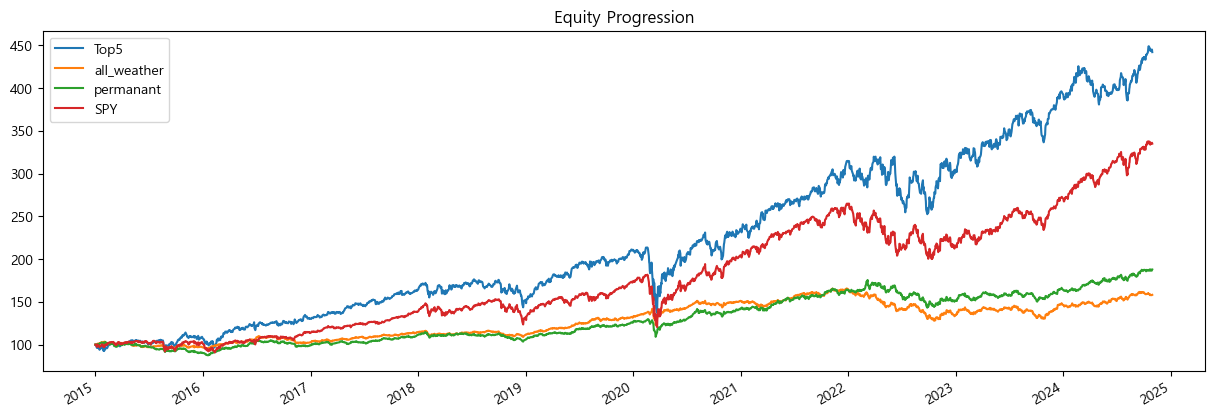

In [18]:
res.plot()

In [19]:
res.display()

Stat                 Top5        all_weather    permanant    SPY
-------------------  ----------  -------------  -----------  ----------
Start                2015-01-01  2015-01-01     2015-01-01   2015-01-01
End                  2024-10-30  2024-10-30     2024-10-30   2024-10-30
Risk-free rate       0.00%       0.00%          0.00%        0.00%

Total Return         341.87%     58.17%         87.85%       234.93%
Daily Sharpe         0.87        0.60           0.74         0.79
Daily Sortino        1.40        0.96           1.19         1.21
CAGR                 16.32%      4.78%          6.62%        13.09%
Max Drawdown         -35.82%     -22.82%        -18.42%      -33.72%
Calmar Ratio         0.46        0.21           0.36         0.39

MTD                  1.47%       -1.77%         0.87%        1.09%
3m                   8.56%       3.27%          6.48%        7.34%
6m                   14.50%      9.53%          10.44%       16.27%
YTD                  12.13%      7.56%      

Momentum Risk Parity Weights: Ticker
Canaan             0.132699
BookingHoldings    0.366497
Chevron            0.046219
Equinux            0.187219
LindePlc           0.267367
Name: 2024-10-30 00:00:00+00:00, dtype: float64


  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00,  2.56it/s]


Stat                 Top5        Momentum_Risk_Parity
-------------------  ----------  ----------------------
Start                2015-01-01  2015-01-01
End                  2024-10-30  2024-10-30
Risk-free rate       0.00%       0.00%

Total Return         341.87%     359.71%
Daily Sharpe         0.87        0.85
Daily Sortino        1.40        1.37
CAGR                 16.32%      16.79%
Max Drawdown         -35.82%     -34.87%
Calmar Ratio         0.46        0.48

MTD                  1.47%       2.40%
3m                   8.56%       12.73%
6m                   14.50%      19.88%
YTD                  12.13%      17.09%
1Y                   29.58%      38.63%
3Y (ann.)            14.08%      15.13%
5Y (ann.)            17.20%      17.62%
10Y (ann.)           16.32%      16.79%
Since Incep. (ann.)  16.32%      16.79%

Daily Sharpe         0.87        0.85
Daily Sortino        1.40        1.37
Daily Mean (ann.)    17.05%      17.71%
Daily Vol (ann.)     19.54%      20.79%
Daily Ske

<AxesSubplot:title={'center':'동일 가중치 vs JTS전략'}>

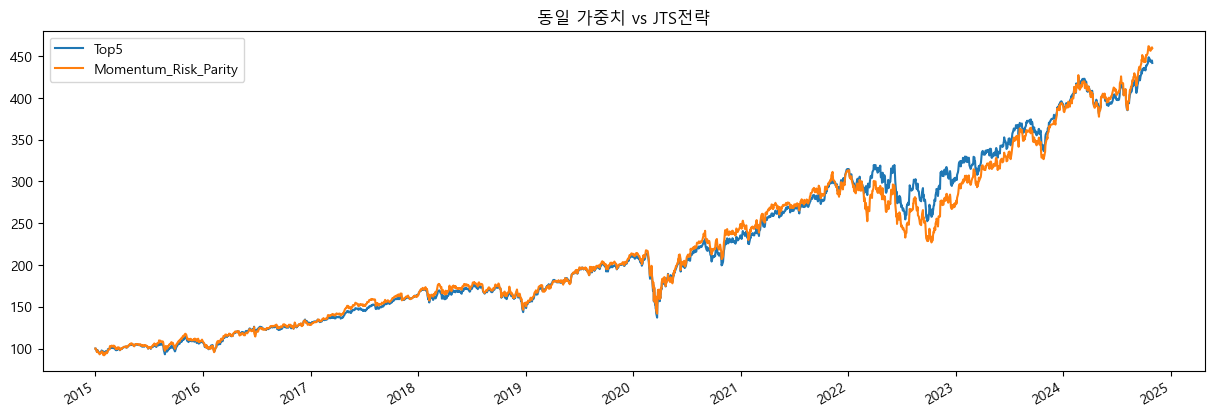

In [21]:
# 모멘텀 계산: 최근 12개월 수익률
momentum = data.pct_change(252).iloc[-1]  # 252는 1년 거래일 기준

# 변동성 계산: 최근 12개월 표준편차
volatility = data.pct_change().rolling(252).std().iloc[-1]

# 모멘텀 Risk Parity 비중 계산
weights = momentum / volatility  # 모멘텀을 변동성으로 나눔
weights = weights.clip(lower=0)  # 음수 가중치 제거
weights = weights / weights.sum()  # 정규화하여 합이 1로 맞춤

# 비중 출력
print("Momentum Risk Parity Weights:", weights)

# 전략 생성
strategy_mrp_filtered = bt.Strategy('Momentum_Risk_Parity',
                                    [bt.algos.RunYearly(run_on_first_date=True,
                                                        run_on_end_of_period=True,
                                                        run_on_last_date=False),
                                     bt.algos.SelectAll(),
                                     bt.algos.WeighSpecified(**weights.to_dict()),
                                     bt.algos.Rebalance()
                                     ])

# 백테스트 실행
bt_mrp_filtered = bt.Backtest(strategy_mrp_filtered, data, initial_capital=10000000)

# 기존 전략과 비교
result_filtered = bt.run(bt1, bt_mrp_filtered)

# 결과 출력
result_filtered.display()
result_filtered.plot(title="동일 가중치 vs JTS전략")

In [22]:
weights

Ticker
Canaan             0.132699
BookingHoldings    0.366497
Chevron            0.046219
Equinux            0.187219
LindePlc           0.267367
Name: 2024-10-30 00:00:00+00:00, dtype: float64